In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [46]:
class Data:
    def __init__(self, file_path):
        self.data = pd.read_csv(file_path)

    def filter_by_date(self, start_date, end_date):
        """
        Filters data by the given date range.
        """
        self.data['dt_date'] = pd.to_datetime(self.data['dt_date'])
        self.data = self.data[(self.data['dt_date'] >= start_date) & 
                              (self.data['dt_date'] <= end_date)]

    def get_data(self):
        return self.data

class TrafficData(Data):
    def __init__(self, file_path):
        super().__init__(file_path)

# Subclass for NO2 Data
class NO2Data(Data):
    def __init__(self, file_path):
        super().__init__(file_path)

In [47]:
def calculate_summary_stats(data, group_column, value_column):
    """
    Calculate the mean and standard deviation for each group (e.g., 2022 and 2023).
    """
    summary_stats = data.groupby(group_column)[value_column].agg(['mean', 'std', 'count']).reset_index()
    return summary_stats

# Function to perform a t-test (or Mann-Whitney U test if necessary)
def compare_means(data, group_column, value_column):
    """
    Perform both a t-test and a Mann-Whitney U test to compare means between two groups.
    """
    # Extract data for each group (2022 and 2023)
    group_2022 = data[data[group_column] == 2022][value_column]
    group_2023 = data[data[group_column] == 2023][value_column]

    # Perform t-test assuming normal distribution
    t_stat, t_p_value = stats.ttest_ind(group_2022, group_2023, equal_var=False)

    # Perform Mann-Whitney U test (for non-parametric comparison)
    u_stat, u_p_value = stats.mannwhitneyu(group_2022, group_2023)

    # Return both test results as a dictionary
    return {
        't-test': {'t-statistic': t_stat, 'p-value': t_p_value},
        'u-test': {'u-statistic': u_stat, 'p-value': u_p_value}
    }


# Function to create boxplots with summary statistics
def create_boxplot_with_stats(data, x_column, y_column, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[x_column], y=data[y_column])
    plt.title(title)
    plt.xticks(rotation=45)

    # Add mean values to the plot
    means = data.groupby(x_column)[y_column].mean().reset_index()
    for i, mean_value in enumerate(means[y_column]):
        plt.text(i, mean_value, f'{mean_value:.2f}', color='black', ha="center")

    plt.tight_layout()
    plt.show()

In [48]:
traffic = TrafficData("traffic.csv")
traffic.filter_by_date("2022-08-01", "2023-09-30")
filtered_traffic = traffic.get_data()

In [49]:
filtered_traffic

,siteId,location,week_group,dt_year,dt_date,dt_month,total_flow
0,GA1571_Q,Hope St,Core Weekdays,2022,2022-08-02,8,1033
1,GA1571_Q,Hope St,Core Weekdays,2022,2022-08-03,8,1073
2,GA1571_Q,Hope St,Core Weekdays,2022,2022-08-04,8,1150
3,GA1571_Q,Hope St,Core Weekdays,2022,2022-08-09,8,1029
4,GA1571_Q,Hope St,Core Weekdays,2022,2022-08-10,8,1108
...,...,...,...,...,...,...,...
483,GG2001_S,High St,Weekends,2023,2023-09-16,9,754
484,GG2001_S,High St,Weekends,2023,2023-09-17,9,515
485,GG2001_S,High St,Weekends,2023,2023-09-23,9,686
486,GG2001_S,High St,Weekends,2023,2023-09-24,9,574


In [50]:
no2 = NO2Data("no2.csv")
no2.filter_by_date("2022-08-01", "2023-09-30")
filtered_no2 = no2.get_data()

In [51]:
filtered_no2

,code,dt_date,no2_daily,dt_year,dt_weekdays,week_group
0,GHSR,2022-08-01,11.835518,2022,Monday,Other Weekdays
1,GHSR,2022-08-02,7.525543,2022,Tuesday,Core Weekdays
2,GHSR,2022-08-03,4.485134,2022,Wednesday,Core Weekdays
3,GHSR,2022-08-04,21.465328,2022,Thursday,Core Weekdays
4,GHSR,2022-08-05,21.312994,2022,Friday,Other Weekdays
...,...,...,...,...,...,...
725,GLKP,2023-09-26,9.783633,2023,Tuesday,Core Weekdays
726,GLKP,2023-09-27,17.154727,2023,Wednesday,Core Weekdays
727,GLKP,2023-09-28,8.776251,2023,Thursday,Core Weekdays
728,GLKP,2023-09-29,8.839336,2023,Friday,Other Weekdays


In [52]:
traffic_stats = calculate_summary_stats(filtered_traffic, 'dt_year', 'total_flow')
print("Traffic Flow Summary Statistics:")
print(traffic_stats)

Traffic Flow Summary Statistics:
   dt_year         mean         std  count
0     2022  1460.754098  722.793487    244
1     2023  1314.483607  564.899645    244


In [ ]:
traffic_test_results = compare_means(filtered_traffic, 'dt_year', 'total_flow')
print("Traffic Flow Comparison Results:")
print("T-test: t-stat = {t-statistic:.3f}, p-value = {p-value:.3f}".format(**traffic_test_results['t-test']))
print("U-test: u-stat = {u-statistic:.3f}, p-value = {p-value:.3f}".format(**traffic_test_results['u-test']))

In [57]:
print("Filtered NO2 Data for 2022:")
print(filtered_no2[filtered_no2['dt_year'] == 2022].head())
print("Filtered NO2 Data for 2023:")
print(filtered_no2[filtered_no2['dt_year'] == 2023].head())

print("Summary statistics for NO2 data by year:")
print(filtered_no2.groupby('dt_year')['no2_daily'].describe())


Filtered NO2 Data for 2022:
   code    dt_date  no2_daily  dt_year dt_weekdays      week_group
0  GHSR 2022-08-01  11.835518     2022      Monday  Other Weekdays
1  GHSR 2022-08-02   7.525543     2022     Tuesday   Core Weekdays
2  GHSR 2022-08-03   4.485134     2022   Wednesday   Core Weekdays
3  GHSR 2022-08-04  21.465328     2022    Thursday   Core Weekdays
4  GHSR 2022-08-05  21.312994     2022      Friday  Other Weekdays
Filtered NO2 Data for 2023:
     code    dt_date  no2_daily  dt_year dt_weekdays      week_group
459  GHSR 2023-08-01  12.323787     2023     Tuesday   Core Weekdays
460  GHSR 2023-08-02  10.900059     2023   Wednesday   Core Weekdays
461  GHSR 2023-08-03  22.032646     2023    Thursday   Core Weekdays
462  GHSR 2023-08-04  12.634678     2023      Friday  Other Weekdays
463  GHSR 2023-08-05  11.960142     2023    Saturday        Weekends
Summary statistics for NO2 data by year:
         count       mean        std       min        25%        50%  \
dt_year        

In [58]:
filtered_no2 = filtered_no2.dropna(subset=['no2_daily'])


In [59]:
def compare_means(data, group_column, value_column):
    """
    Perform both a t-test and a Mann-Whitney U test to compare means between two groups.
    """
    # Extract data for each group (2022 and 2023)
    group_2022 = data[data[group_column] == 2022][value_column]
    group_2023 = data[data[group_column] == 2023][value_column]

    # Check if the groups are empty or have no variance
    if group_2022.empty or group_2023.empty:
        return {
            't-test': {'t-statistic': float('nan'), 'p-value': float('nan')},
            'u-test': {'u-statistic': float('nan'), 'p-value': float('nan')}
        }

    if group_2022.var() == 0 or group_2023.var() == 0:
        print(f"Warning: One of the groups has no variance. Skipping t-test and U-test.")
        return {
            't-test': {'t-statistic': float('nan'), 'p-value': float('nan')},
            'u-test': {'u-statistic': float('nan'), 'p-value': float('nan')}
        }

    # Perform t-test assuming normal distribution
    t_stat, t_p_value = stats.ttest_ind(group_2022, group_2023, equal_var=False)

    # Perform Mann-Whitney U test (for non-parametric comparison)
    u_stat, u_p_value = stats.mannwhitneyu(group_2022, group_2023)

    # Return both test results as a dictionary
    return {
        't-test': {'t-statistic': t_stat, 'p-value': t_p_value},
        'u-test': {'u-statistic': u_stat, 'p-value': u_p_value}
    }


In [60]:
# Perform t-test and u-test for NO2 Data
no2_test_results = compare_means(filtered_no2, 'dt_year', 'no2_daily')
print("\nNO2 Levels Comparison Results:")
print("T-test: t-stat = {t-statistic:.3f}, p-value = {p-value:.3f}".format(**no2_test_results['t-test']))
print("U-test: u-stat = {u-statistic:.3f}, p-value = {p-value:.3f}".format(**no2_test_results['u-test']))



NO2 Levels Comparison Results:
T-test: t-stat = 6.939, p-value = 0.000
U-test: u-stat = 54731.000, p-value = 0.000


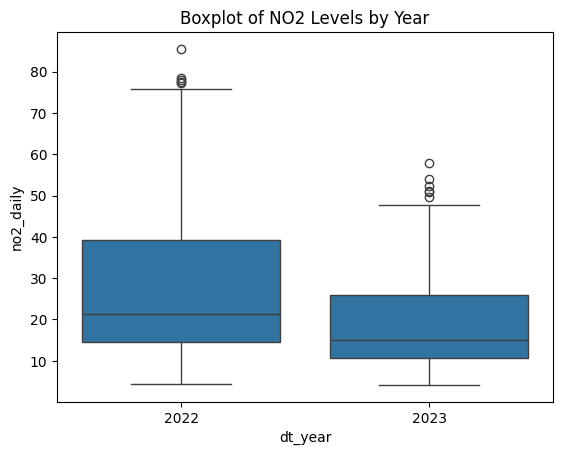

In [61]:
sns.boxplot(x='dt_year', y='no2_daily', data=filtered_no2)
plt.title('Boxplot of NO2 Levels by Year')
plt.show()
